<a href="https://colab.research.google.com/github/kevinguan-glitch/Breast-Cancer-Malignancy-Prediction/blob/main/Final_KNN_Algorithm_for_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Nearest Neighbors 

Simple and can be used for both regression and classification 

For the classification problems, the algorithm compares the distance from a new observation to that of each observation in a training set. It returns the closest k neighbor of the new observation

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)
import matplotlib.pyplot as plt

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)
from IPython.display import display

import sklearn 
print("scikit-learn version:", sklearn.__version__)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics

import torch
print("Torch version:", torch.__version__)
import torch.nn as nn
import torchvision
print("TorchVision version:", torchvision.__version__)
import torch.optim as optim
from torch.utils import data
from torch.optim import lr_scheduler
from torch.nn.functional import softmax
from torchvision import datasets, models, transforms
import seaborn as sns
import random
import math 
from math import sqrt 
import time
import copy
import os
from google.colab import drive

pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
Torch version: 1.8.1+cu101
TorchVision version: 0.9.1+cu101


The data is already preinstalled in the sklearn dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("The keys are \n", cancer.keys(), "\n")
print("Shape of cancer data: ", cancer.data.shape, "\n") #569 data points, 30 features 
print("Feature names are \n", cancer.feature_names)

The keys are 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

Shape of cancer data:  (569, 30) 

Feature names are 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print("Sample counts per class: \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class: 
 {'malignant': 212, 'benign': 357}


In [ ]:
!pip install mglearn
import mglearn

#The "k" in k-neighbors 
Represent the neighbors to pull in 

Variation in the nearest neighbor models determine distance and generates a prediction 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


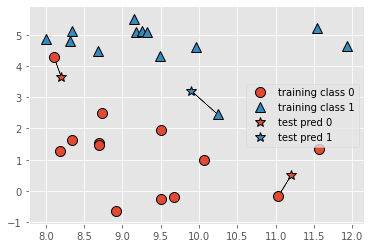

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

Use this function to find the Euclidean distance which is a measure of a straight line between 2 points! 

From a pythagorean theorem point of view, the greater the value, the greater the difference! 

In [ ]:
def euclidean_distance(row1, row2): 
  distance = 0.0 
  #make this a float 

  for dist in range(len(row1) - 1):
    distance += (row1[dist] - row2[dist])**2

    return sqrt(distance)

#Measure the square difference of 2 points  

Function to find the neighbors in a new observation. It will return the lowest k-distance

In [ ]:
def get_neighbors(train, new_obs, k): 
  #Trying to locate similar neighbors or "k neighbors" 
  #Using euclidian distances 
  """ 
  Paramater: 
    train: a dataset (array)
    new_observation: observation of which neighbors are found
    k: k-neighbors (number of neighbors to be found (in int))
  """

  distances = []
  neighbors = []

  if type(train) == pd.core.frame.DataFrame: 
    for dist, rows in train.iterrows():
      length = euclidean_distance(new_obs, list(rows))
      distances.append((dist, length))
      distances.sort(key = lambda tup: tup[1])
  else: 
    for dist, rows in enumerate(train):
      length = euclidean_distance(new_obs, row)
      distances.append((dist, length))
      distances.sort(key = lambda tup: tup[1])
  for i in range(k):
    neighbors.append(distances[i])
    
    return neighbors

Prediction from the nearest neighbor algorithm. Use a labeling system to achieve a higher accuracy over a voting systen

In [ ]:
""" 
Predict the class from new observation from the provided training data 

The parameters: 
  train: training a pandas dataframe or array
  new_observation: observation where the neighbors are found
  k-neighbors: the number of neighbors to be found
"""
def predict_classification(train, new_obs, k): 
  neighbors = get_neighbors(train, new_obs, k) #compile a list of neighbors
  n_index = neighbors[0][0] 
  #the index for the closest neighbors using splicing 

  if type(train) == pd.core.frame.DataFrame:
    loc = train.columns[-1]
    pred = train[loc][n_index] #the labels are on the last column of the dataframe
  else:
    pred = train[n_index][-1]
  return pred 
  

Accuracy is the number of correct over the total number. 

In [ ]:
def accuracy(x, y):
  correct = 0
  for i in range(len(x)):
    if type(x) == pd.core.series.Series:
      if x.iloc[i] == y[i]:
        correct += 1
    else: 
      if x[i] == y[i]:
        correct += 1
    return correct / float(len(x))


In [ ]:
from sklearn.model_selection import train_test_split 
cols = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names = cols)
names = []
for x in df["class"]:
    x = x.replace("Iris-", "")
    names.append(x)

df["class"] = names
labels = []

for x in df["class"]:
  x = x.replace("versicolor","0")
  x = x.replace("virginica","1")
  x = x.replace("setosa","2")
  x = int(x)
  labels.append(x)
    
df["class"] = labels

In [ ]:
train, test = train_test_split(df, train_size=0.70, test_size=0.30, random_state=5)

target = "class"
X_test = test.drop(target, axis=1)
y_test = test[target]
# Generate Predictions
predictions = []

KNN Class in OOP

In [ ]:
class KNearestNeighbor:
    
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        self.train = None
    
    def __euclidean_distance(self, row1, row2):
        """
        The square root of the sum of the squared differences between two vectors.
        The smaller the value, the more similar two records will be.
        Value of 0 indicates no difference.
        
        euclidian distance = sqrt(sum i to N (x1_i - x2_i)^2)
        """
        # 0.0 so that distance will float
        distance = 0.0

        # loop for columns
        for i in range(len(row1) - 1):
            # squared difference between the two vectors
            distance += (row1[i] - row2[i])**2

        return sqrt(distance)
    
    
    def fit(self, train):
        """Fits model to training data"""
        self.train = train
        
    def __get_neighbors(self, train, new_obs, k):
        """
        Locates most similar neighbors via euclidian distance.

        Params: 

            train: a dataset

            new_obs: a new observation; observation for which neighbors are to be found

            k: k-neighbors; the number of neighbors to be found (int)
        """

        distances = []
        neighbors = []
        
        # Rules for whether or not train is a pandas.DataFrame
        if type(train) == pd.core.frame.DataFrame:
            
            for i,row in train.iterrows():
                # calculate distance
                d = self.__euclidean_distance(new_obs, list(row))

                # fill distances list with tuples of row index and distance
                distances.append((i, d))

                # sort distances by second value in tuple
                distances.sort(key=lambda tup: tup[1])
        else:
            
            for i,row in enumerate(train):
                # calculate distance
                d = self.__euclidean_distance(new_obs, row)

                # fill distances list with tuples of row index and distance
                distances.append((i, d))

                # sort distances by second value in tuple
                distances.sort(key=lambda tup: tup[1])

        for i in range(k):
            # Grabs k-records from distances list
            neighbors.append(distances[i])

        return neighbors
    
    
    def predict(self, train, new_obs):
        """
        Predicts a class label on a new observation from provided training data.

        Params: 

            new_obs: a new observation; observation for which neighbors are to be found

            k: k-neighbors; the number of neighbors to be found (int)
        """
        self.train = train #> for some reason, defining the model again with passing
                           #> in train with method call brought accuracy up to 95%,
                           #> whereas without this, accuracy was 31%. Not clear why 
                           #> this is the case since self.train is already defined in
                           #> the `model.fit()` call ...
        
        # Compile list of neighbors
        neighbors = self.__get_neighbors(self.train, new_obs, self.n_neighbors)
        
        # Grab index of the closest neighbor
        n_index = neighbors[0][0]
        
        # Add rules for if train is a pandas.DataFrame
        if type(self.train) == pd.core.frame.DataFrame:
            # Assumes labels are in last column of dataframe
            loc = self.train.columns[-1]
            pred = self.train[loc][n_index]
        else:
            # Prediction is the label from train record at n_index location. Assumes label
            # is at end of record.
            pred = self.train[n_index][-1]

        return pred
    
    def score(self, x, y):
        """
        Calculates accuracy of predictions (on classification problems).

        Params:

            x: actual, or correct labels

            y: predicated labels
        """

        correct = 0

        for i in range(len(x)):
            # Rules for if `x` is a pandas.Series
            if type(x) == pd.core.series.Series:
                if x.iloc[i] == y[i]:
                    correct += 1

            else:
                if x[i] == y[i]:
                    correct += 1

        return correct / float(len(x))

In [ ]:
nn = KNearestNeighbor(n_neighbors=3)
predictions = []
for _, obs in X_test.iterrows():
    pred = nn.predict(train, list(obs))
    predictions.append(pred)

print(f"Iris KNearestNeighbors Accuracy: {accuracy(y_test, predictions):.2f}")

Iris KNearestNeighbors Accuracy: 0.02


Comparing the built KNN Algorithm to the built in algorithm!


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train = train.drop(target, axis=1)
y_train = train[target]
scitkit_nn = KNeighborsClassifier(n_neighbors=3)
scitkit_nn.fit(X_train, y_train)
scitkit_preds = scitkit_nn.predict(X_test)

print(f"Scikit-learn KNeighborsClassifier on Iris Accuracy: {scitkit_nn.score(X_test, y_test):.2f}")

Scikit-learn KNeighborsClassifier on Iris Accuracy: 0.96


As seen here, the Scikit-Learn preinstalled KNeighbors Classifier is so much better than the one built here! 

In [ ]:
#Breast Cancer Data
from sklearn.model_selection import train_test_split 
cancer_cols = ["Class", "Age", "Menopause", "Tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]
cancer_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"

cancer_df = pd.read_csv(cancer_url, names = cancer_cols)
names = []

for x in cancer_df["Class"]:
    x = x.replace("-events", "")
    names.append(x)

cancer_df["Class"] = names
labels = []

for x in cancer_df["Class"]:
  x = x.replace("no-recurrrence","0")
  x = x.replace("recurrence","1")
  labels.append(x)
    
cancer_df["Class"] = labels

cancer_train, cancer_test = train_test_split(cancer_df, train_size=0.70, test_size=0.30, random_state=5)

target = "Class"
X_test = cancer_test.drop(target, axis=1)
y_test = cancer_test[target]
# Generate Predictions
predictions = []

In [ ]:
nn = KNearestNeighbor(n_neighbors=3)
predictions = []
for _, obs in X_test.iterrows():
    pred = nn.predict(cancer_train, list(obs))
    predictions.append(pred)

print(f"Cancer KNearestNeighbors Accuracy: {accuracy(y_test, predictions):.2f}")

TypeError: ignored

#Preprocessing is important! 
The error here was that the dataset was not preproccessed. It does not make sense to find Euclidean distance on strings and not floats!

So download the Wisconsin Breast cancer data and preprocess it on local library!

"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


In [ ]:
drive.mount('/content/drive/', force_remount = True)
os.chdir("/content/drive/My Drive/Final Project_Data/")

Mounted at /content/drive/


In [ ]:
matplotlib.style.use('ggplot')
df=pd.read_csv('wdbc.data', names=['ID','Diagnosis','Radius','Texture','Perimeter','Area','Smoothness',
                                   'Compactness','Concavity','Concave_point','Symmetry','Fractal_dimensions',
                                   'RadiusSE','TextureSE','PerimeterSE','AreaSE','SmoothnessSE',
                                   'CompactnessSE','ConcavitySE','Concave_pointSE','SymmetrySE','Fractal_dimensionsSE',
                                   'RadiusW','TextureW','PreimeterW','AreaW','SmoothnessW',
                                   'CompactnessW','ConcavityW','Concave_pointW','SymmetryW','Fractal_dimensionsW'],engine='c')
df.head()


,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions,RadiusSE,TextureSE,PerimeterSE,AreaSE,SmoothnessSE,CompactnessSE,ConcavitySE,Concave_pointSE,SymmetrySE,Fractal_dimensionsSE,RadiusW,TextureW,PreimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,Concave_pointW,SymmetryW,Fractal_dimensionsW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.dtypes)

ID                        int64
Diagnosis                object
Radius                  float64
Texture                 float64
Perimeter               float64
Area                    float64
Smoothness              float64
Compactness             float64
Concavity               float64
Concave_point           float64
Symmetry                float64
Fractal_dimensions      float64
RadiusSE                float64
TextureSE               float64
PerimeterSE             float64
AreaSE                  float64
SmoothnessSE            float64
CompactnessSE           float64
ConcavitySE             float64
Concave_pointSE         float64
SymmetrySE              float64
Fractal_dimensionsSE    float64
RadiusW                 float64
TextureW                float64
PreimeterW              float64
AreaW                   float64
SmoothnessW             float64
CompactnessW            float64
ConcavityW              float64
Concave_pointW          float64
SymmetryW               float64
Fractal_

In [ ]:
df.head()


,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions,RadiusSE,TextureSE,PerimeterSE,AreaSE,SmoothnessSE,CompactnessSE,ConcavitySE,Concave_pointSE,SymmetrySE,Fractal_dimensionsSE,RadiusW,TextureW,PreimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,Concave_pointW,SymmetryW,Fractal_dimensionsW
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,ID,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_point,Symmetry,Fractal_dimensions,RadiusSE,TextureSE,PerimeterSE,AreaSE,SmoothnessSE,CompactnessSE,ConcavitySE,Concave_pointSE,SymmetrySE,Fractal_dimensionsSE,RadiusW,TextureW,PreimeterW,AreaW,SmoothnessW,CompactnessW,ConcavityW,Concave_pointW,SymmetryW,Fractal_dimensionsW
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    569 non-null    int64  
 1   Diagnosis             569 non-null    object 
 2   Radius                569 non-null    float64
 3   Texture               569 non-null    float64
 4   Perimeter             569 non-null    float64
 5   Area                  569 non-null    float64
 6   Smoothness            569 non-null    float64
 7   Compactness           569 non-null    float64
 8   Concavity             569 non-null    float64
 9   Concave_point         569 non-null    float64
 10  Symmetry              569 non-null    float64
 11  Fractal_dimensions    569 non-null    float64
 12  RadiusSE              569 non-null    float64
 13  TextureSE             569 non-null    float64
 14  PerimeterSE           569 non-null    float64
 15  AreaSE                5

In [ ]:
print(df.shape)

(569, 32)


Convert the strings to numbers to avoid another error.

In [ ]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0
  
df['Diagnosis'] = df['Diagnosis'].apply(diagnosis_value)

#Normalize the data

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.29767572e+00,  1.09706398e+00, -2.07333501e+00,
         1.26993369e+00,  9.84374905e-01,  1.56846633e+00,
         3.28351467e+00,  2.65287398e+00,  2.53247522e+00,
         2.21751501e+00,  2.25574689e+00,  2.48973393e+00,
        -5.65265059e-01,  2.83303087e+00,  2.48757756e+00,
        -2.14001647e-01,  1.31686157e+00,  7.24026158e-01,
         6.60819941e-01,  1.14875667e+00,  9.07083081e-01,
         1.88668963e+00, -1.35929347e+00,  2.30360062e+00,
         2.00123749e+00,  1.30768627e+00,  2.61666502e+00,
         2.10952635e+00,  2.29607613e+00,  2.75062224e+00,
         1.93701461e+00],
       [ 1.29767572e+00,  1.82982061e+00, -3.53632408e-01,
         1.68595471e+00,  1.90870825e+00, -8.26962447e-01,
        -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
         1.39236330e-03, -8.68652457e-01,  4.99254601e-01,
        -8.76243603e-01,  2.63326966e-01,  7.42401948e-01,
        -6.05350847e-01, -6.92926270e-01, -4.40780058e-01,
         2.60162067e-01, -8.05

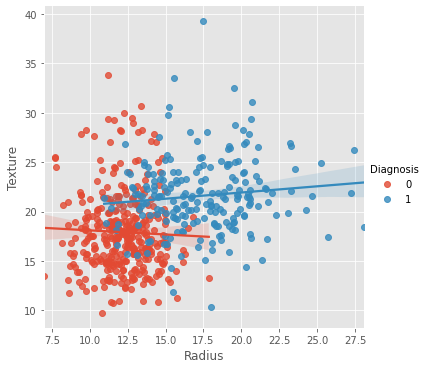

In [ ]:
sns.lmplot(x = 'Radius', y = 'Texture', hue = 'Diagnosis', data = df)

In [ ]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['Diagnosis'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.9308510638297872

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9468085106382979

So changing the k number can change the accuracy! Let's do further experiment on this!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 31) (455,)
Test set: (114, 31) (114,)


In [ ]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)
#predicting part
yhat = neigh.predict(X_test)
yhat[0:5]
mean_acc = np.zeros((k-1))
std_acc = np.zeros((k-1))
for n in range(1,k):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.926509186351706
Test set Accuracy:  0.973404255319149


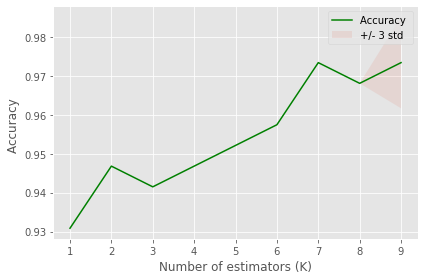

In [ ]:
plt.plot(range(1,k),mean_acc,'g')
plt.fill_between(range(1,k),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of estimators (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.973404255319149 with k= 7


But that was only in the range of 0 to 10. What if there was a k value between 0 to infinity? Let's find out the optimal K value

#Cross Validation
Now performing Cross Validation to find the optimal number of neighbors in order to have a better prediction!

In [ ]:
neighbors = []
cv_scores = []
  
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of k neighbors to use is  13 


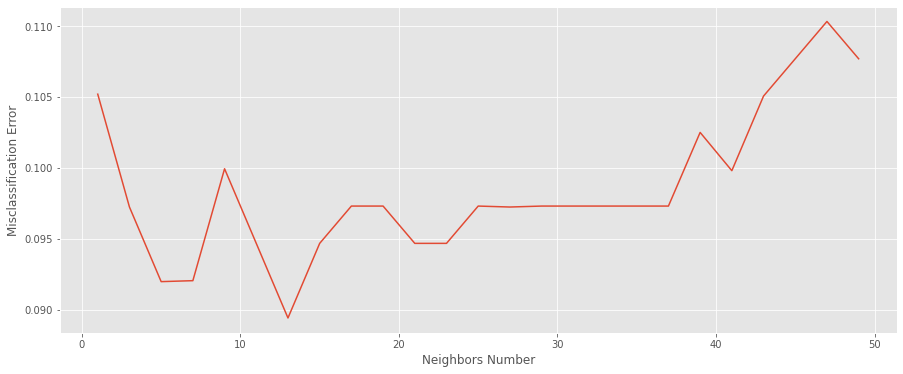

In [ ]:
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of k neighbors to use is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (15, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Neighbors Number')
plt.ylabel('Misclassification Error')
plt.show()

Well let's check out the N neighbor = 7!

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9473684210526315

Success it does have a high prediction rate!